In [1]:
pip install eli5 lime dalex neattext spacy altair


  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=01082b2610d93ff5332089597e87f5b632b71e4249774112c645c15955950a25
  Stored in directory: c:\users\murra\appdata\local\pip\cache\wheels\7b\26\a5\8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=3cc8270990896436d30a7576d98591cbbd13c28c424b5c801790e06f3cbf7b74
  Stored in directory: c:\users\murra\appdata\local\pip\cache\wheels\ed\d7\c9\5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
  Created wheel for dalex: filename=dalex-1.5.0-py3-none-any.whl size=1043321 sha256=71a1bed38ce676e5c055ab3c8786b8ad68e947861a08c5da092eb052e981862b
  Stored in directory: c:\users\murra\appdata\local\pip\cache\wheels\c2\ef\2b\f855b363dcae6ea0693f578061dc5becac082d2be04764117f
Successfully built eli5 lime dalex


### End 2 End NLP Project
+ Emotion detection in text 
+ Text Classifier

In [1]:
#Load EDA libraries
import pandas as pd
import numpy as np

In [2]:
#Load visualization libraries
import seaborn as sns

In [4]:
#Load text cleaning libraries
import neattext.functions as nfx


In [6]:
#load ML libraries
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [8]:
#Load Dataset
df =  pd.read_csv('Data/emotion_dataset_raw.csv')

In [9]:
#view the dataset
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [10]:
#value counts of the target variable
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

c:\Users\murra\anaconda3\envs\kaggle-projects\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Emotion', ylabel='count'>

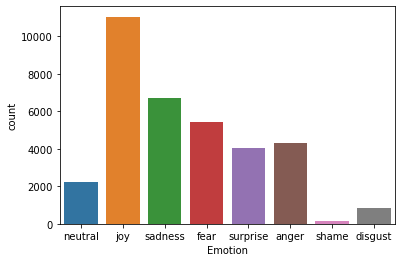

In [11]:
#plot
sns.countplot(df['Emotion'])

In [ ]:
#Data cleaning
dir(nfx)

In [13]:
df['cleaned_text'] = df['Text'].apply(nfx.remove_stopwords)
df['cleaned_text'] = df['cleaned_text'].apply(nfx.remove_userhandles)
df


,Emotion,Text,cleaned_text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga a...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [15]:
# Features and Labels
X = df['cleaned_text']
y = df['Emotion']

In [16]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
#Build a pipeline
from sklearn.pipeline import Pipeline

In [18]:
# Logistic Regression Pipeline
pipe_lr = Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [19]:
#Train the model
pipe_lr.fit(X_train, y_train)

c:\Users\murra\anaconda3\envs\kaggle-projects\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [20]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [21]:
#check the accuracy
pipe_lr.score(X_test, y_test)

0.631412559275758

In [26]:
# Make predictions
exl = "Oh my god, I am so happy today"

In [27]:
pipe_lr.predict([exl])

array(['joy'], dtype=object)

In [28]:
pipe_lr.predict_proba([exl])

array([[1.39688315e-03, 8.67232996e-04, 2.88883699e-03, 9.25734270e-01,
        5.65638708e-04, 4.12415431e-02, 8.00497973e-05, 2.72255449e-02]])

In [29]:
# Classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [30]:
# Save Model and Pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr.pkl", "wb")
joblib.dump(pipe_lr, pipeline_file)
pipeline_file.close()